
# Learning with [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)

## Agenda
- Decision trees and metrics.  
- Decision tree for classification.  
- Decision tree for regression.  
- Random forests.  

## Resources
[dtreeviz - package for visualizing decision trees](https://github.com/parrt/dtreeviz)
<br>[Leo Breiman's Random Forest Notes](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm)


Contains material from:
- Machine Learning with Python 3rd Edition, Pages 90-103.    
- The Hundred-Page Machine Learning Book, Pages 27-30. 
- Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow, Pages 175-211.  

We've likely seen and use some sort of decision trees all of the time.

<img src='files/diagrams/sample-dt.png' style='width: 600px;'>

[Image source Python Machine Learning 3rd Edition, Page 91](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch03)

From [The Hundred-Page Machine Learning Book by Burkov](http://themlbook.com):

> A decision trees can be represented by an acyclic graph that can be used to make decisions. In each branching node of the graph, a specific feature $j$ of the feature vector is examined. If the value of the feature is below a specific threshold, then the left branch is followed; otherwise, the right branch is followed. As the leaf node is reached, the decision is made about the class to which the example belongs.


## Pros:
- Very interpretable (white box model).  
- Decisions can be traced and visualized.  
- Can be used for classification or regression.  
- Accepts continous and discrete features.  
- Robust to outliers and other "bad" data.  
- Doesn't require feature scaling or centering.  
- No assumptions about the data (compared to the linearity assumption for linear regression).  

## Cons:
- Very easy to overfit, though a hyperparameter can address this.  
- Requires a lot of hyperparameter tuning.  
- Won't explicitly capture non-linearity.  
- Depending on the implementation, the solution may not be optimal.  
- Very sensitive to differences between the training and test sets.  

## Nonparametric model
Logistic regression finds an optimal solution by building a parametric model to minimize the log likelihood, $f_{w^*, b*}$.

Decision trees constructs a nonparametric model to approximately optimize, $f(x)\equiv Pr(y=1|x)$.
- It doesn't have to use each variable, so no weights like in logistic regression.  
- No predetermined number of parameters to learn weights - they aren't defined prior to training.

## Algorithms
There are multiple algorithms that can be used to build decision trees.
- [Classification and Regression Tree (CART)](https://en.wikipedia.org/wiki/Decision_tree_learning)  
- [ID3](https://en.wikipedia.org/wiki/ID3_algorithm)  
- [C4.5](https://en.wikipedia.org/wiki/C4.5_algorithm)    

scikit-learn uses CART. It will produce nodes that always have two children (yes and no). ID3 and other algorithms can produce trees that contain more than two children. scikit-learn implementation doesn't support categorical variables, so you'll still need to turn them into numbers.

From [scikit-learn:](https://scikit-learn.org/stable/modules/tree.html)  
**ID3**  
(Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.

**C4.5**  
C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.

**CART**  
CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.


## Metrics used in Decision Trees
Information gain - this is maximized at each split:
$$
IG(D_{p,f})=I(D_p)-\sum\frac{N_j}{N_p}I(D_j)
$$

Using either

(1) Gini impurity - measures the *impurity* of the classes. A gini score of 0 means that node only contains examples of a single class. You'll want this to be as close to 0 as possible (without overfitting) in the terminal leafs.
$$
G_{i} = 1 - \sum(p_{i,k}^2)
$$

$p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node.

or (2) Entropy - another impurity measure, originated in themodynamics. Entropy is 0 when all classes are identical.  
$$
H_{i}=-\sum{p_{i,k}log_{2}(p_{i,k})}
$$

Both can be used in the objective function.
- Most of the time the trees will be similar.  
- Gini is less complicated and will run slightly faster.  
- Entropy tends to make slightly more balanced trees and gini tends to favor the larger class.  
- Entropy will be at its maximum at 1 when the classes have an uniform distribution in the node.  

For a 2-class problem, gini will have a maximum of 0.5, $1-\sum(0.5^2)=0.5$

<img src='files/diagrams/simple-example.png' style='width: 500px;'>

[Image source Python Machine Learning 3rd Edition, Page 93](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch03)

### Calculating gini:
Starting:
$$
I_{G}(D_p) = 1 - (0.5^2 + 0.5^2) = 0.5
$$

#### Node A

$$
A:I_{G}(D_{left}) = 1 - (0.75^2 + 0.25^2) = 0.375
$$

<br>

$$
A:I_{G}(D_{right}) = 1 - (0.25^2 + 0.75^2) = 0.375
$$

<br>
Information gain:

$$
A:IG_{G} = 0.5 - (0.5)(0.375)-(0.5)(0.375) = 0.125
$$

#### Node B

$$
B:I_{G}(D_{left}) = 1 - (0.33\bar{3}^2 + 0.66\bar{6}^2) = 0.\bar{4}
$$

<br>

$$
B:I_{G}(D_{right}) = 1 - (1^2 + 0^2) = 0
$$

<br>
Information gain:

$$
B:IG_{G} = 0.5-(0.75)(0.\bar{4}) -  0= 0.\bar{16}
$$

Gained more information in B, since the information gain was larger ($0.\bar{16}\gt0.125$).

### Calculating entropy:

$$
I_H(D_p)=-(0.5log_2(0.5)+0.5log_2(0.5))=1
$$

#### Node A

$$
A:I_H(D_{left})=-(0.75log_2(0.75)+0.25log_2(0.25))=0.81
$$

<br>

$$
A:I_H(D_{right})=-(0.25log_2(0.25)+0.75log_2(0.75))=0.81
$$

<br>
Information gain:

$$
A:IG_H=1-(0.5)(0.81)+(0.5)(0.81)=0.19
$$

#### Node B

$$
B:I_H(D_{left})=-(0.33log_2(0.33)+0.66log_2(0.66))=0.92
$$

<br>

$$
B:I_H(D_{right})=0
$$

<br>
Information gain:

$$
B:IG_H=1-(\frac{6}{8})(0.92)+0=0.31
$$

Gained more information in B, since the information gain was larger ($0.31\gt0.19$).

### Objective Function (CART)
- Split training set into two subsets using a single feature $k$ and a threshold $t_k$ (e.g., height > 10).  
- Searches for the feature and threshold that produces the smallest weighted impurity (Raschka uses the language "maximizing information gain").

$$
J{k,t_k}=\frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}
$$

- $G_{left/right}$ measures the impurity of the left/right subset.  
- $m_{left/right}$ is the number of instances in the left/right subset.    

- Once the data is split, it splits each subset, then each subset of the subsets, ...   
- It'll stop once it reaches either a maximum depth or if the splits don't reduce impurity.  

### CART is a "Greedy"
- Searches for optimum splits at the top and continues down for optimum splits.  
- It doesn't look ahead or backwards to see if that split led to the lowest possible impurity.  
- Therefore, not guaranteed to be optimal.  

### Optimum Doesn't Exist
This is an NP-Complete problem. The time required to guarantee the optimum solution approaches infinity even for smaller datasets.

# Classification
Load the iris data:

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

iris = load_iris()
irisX = iris['data']
irisy = iris['target']
irisNames = iris['feature_names']

Split the dataset into training and test datasets:

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(irisX, irisy)

Fit a tree with defaults and visualize the rules:

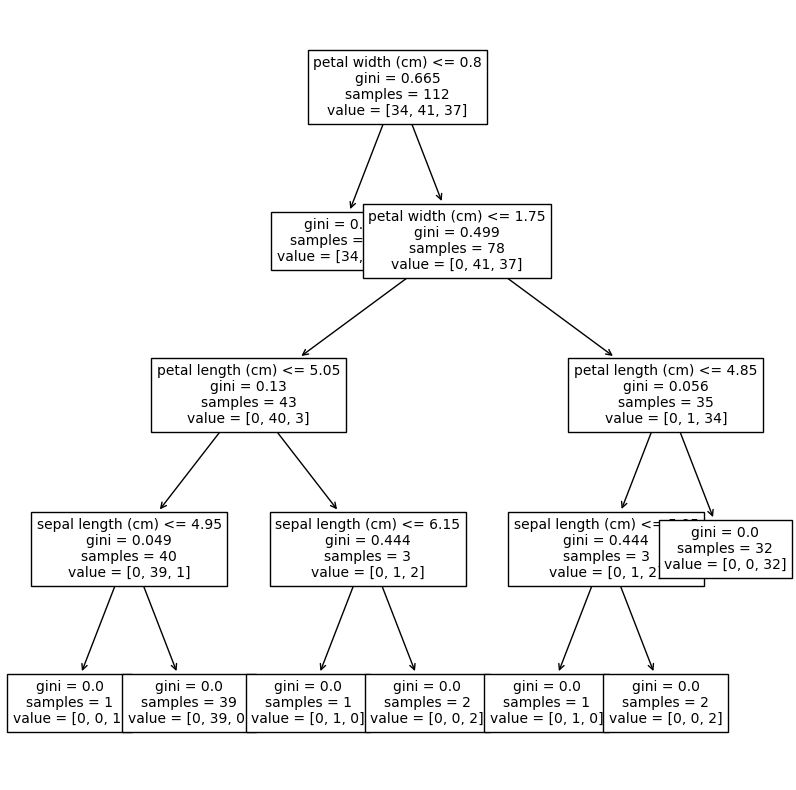

In [85]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', random_state=1)
tree_model.fit(X_train, y_train)

from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(tree_model, feature_names=irisNames, fontsize=10)
plt.show()

> Visualizing isn't crucial for modeling. It presents a nice interpretation, but we will use the metrics we discussed the past few weeks to evaluate the model's performance.

In [86]:
print(f'Training accuracy: {tree_model.score(X_train, y_train):.2f}')
print(f'Test accuracy: {tree_model.score(X_test, y_test):.2f}')

Training accuracy: 1.00
Test accuracy: 0.92


It can output probabilities, though not in the same way:
> The predicted class probability is the fraction of samples of the same class in a leaf. Since the leafs was 100% pure, these "probabilities" will be zero or one.

In [16]:
tree_model.predict_proba(X_test)[:5, :]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In the `iris` case, since the tree fully split, the probabilities will be 0 or 1.

> Seems to be overfitting. Trees can overfit on the training data if we don't control how deep they can grow and characteristics around samples per leaf.

It isn't hard to see how. The below plot from scikit-learn provides an illustration of the decision boundaries.
<img src='files/diagrams/iris-decision-bounds.png' style='width: 500px;'>

[Image source: scikit-learn](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)

# Regularization
- Instead of $L1$ and $L2$, there are different ways to prevent overfitting.  
- Instead of incorporating penalties into the cost function, overfitting is controlled with a variety of hyperparameters:
    - How deep the tree can growth (`max_depth`)  
    - Samples needed for a split to be possible (`min_samples_split`)  
    - Number of samples a leaf must have (`min_samples_leaf`)  
    - Change in the impurity from node to node (`min_impurity_decrease`)  
    - ...
- You'll need to follow best practices for determining the values of these hyperparameters.  
- For this small `iris` data, we'll want to do cross validation and a grid search.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

tr_pipe = modeling_pipeline = Pipeline([
        ('dt', DecisionTreeClassifier())
        ]
    )

param_grid = [
  {'dt__max_depth': [3,4,5,6,7,8],
   'dt__min_samples_split': [2,4,6,8]
  }
 ]

iris_gs = GridSearchCV(estimator=tr_pipe, param_grid=param_grid, scoring='accuracy', refit=True)
iris_gs = iris_gs.fit(X_train, y_train)

iris_gs.best_params_

{'dt__max_depth': 3, 'dt__min_samples_split': 2}

In [18]:
iris_gs.best_score_

0.9549407114624506

> Using `refit=True` we retain the best estimates and can score the test data with the best estimator.

In [19]:
iris_gs.score(X_test, y_test)

0.9210526315789473

That's about a 3-point improvement in our test accuracy.

#### "Regularization" resulted in a smaller tree

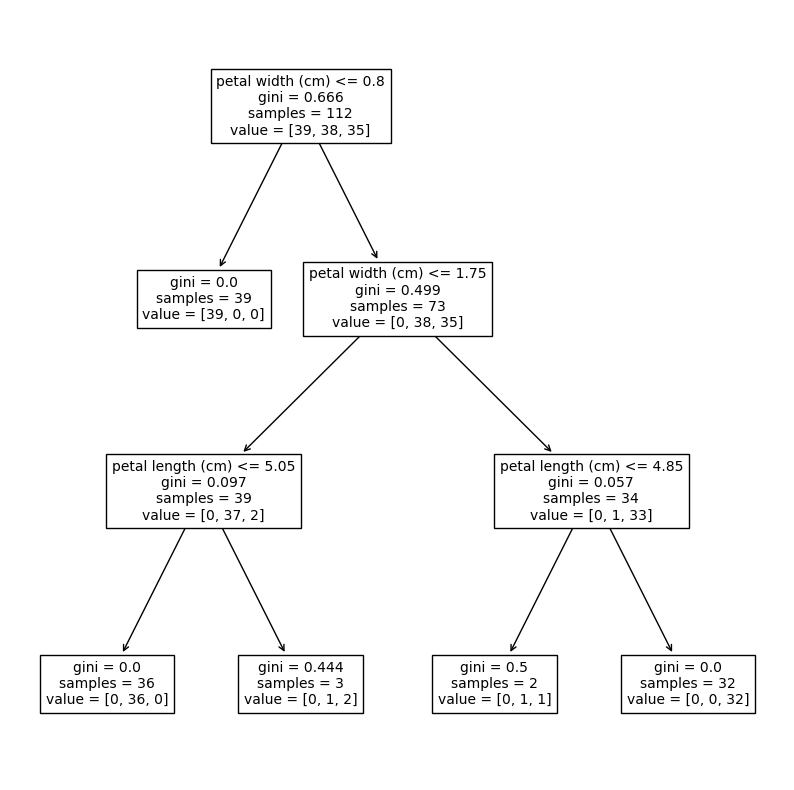

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=3, min_samples_split=2)
tree_model.fit(X_train, y_train)

from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(tree_model, feature_names=irisNames, fontsize=10)
plt.show()

In [21]:
np.unique(tree_model.predict_proba(X_test))

array([0.        , 0.33333333, 0.5       , 0.66666667, 1.        ])

Probabilities will match the leaf distributions:

> .97058824 = 33/(0+33+1)

> 0.4 = 2/(0+2+3)

> 1.0 = 33/(0+0+33)

## Comparing Tree to Logistic Regression on the Credit Default Data

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

credit = pd.read_csv('Default.csv', index_col=0)

# we created this last week
credit['balance2income'] = credit['balance']/credit['income']
credit['balance_student_int'] = np.where(credit['student']=='Yes', credit['balance'], 0)
credit['income_student_int'] = np.where(credit['student']=='Yes', credit['income'], 0)
credit['zero_balance'] = np.where(credit['balance'] == 0, 'Yes', 'No')

credit_y = np.where(credit['default'] == 'Yes', 1, 0)

credit.head()

,default,student,balance,income,balance2income,balance_student_int,income_student_int,zero_balance
1,No,No,729.526495,44361.625074,0.016445,0.000000,0.0000,No
2,No,Yes,817.180407,12106.134700,0.067501,817.180407,12106.1347,No
3,No,No,1073.549164,31767.138947,0.033794,0.000000,0.0000,No
4,No,No,529.250605,35704.493935,0.014823,0.000000,0.0000,No
5,No,No,785.655883,38463.495879,0.020426,0.000000,0.0000,No


In [72]:
from sklearn.model_selection import train_test_split

creditFeatures = [x for x in credit.columns if x != 'default']

X_train, X_test, y_train, y_test = train_test_split(credit[creditFeatures], credit_y, test_size=0.20)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 8,000
Test examples: 2,000


> The Logistic Regression Pipeline from Last Time:

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

nums = ['balance2income', 'balance', 'income', 
        'balance_student_int', 'income_student_int']

ohes = ['student', 'zero_balance']

processing_pipeline = ColumnTransformer(transformers=[
    ('numscaling', StandardScaler(), nums),
    ('dummys', OneHotEncoder(drop='first'), ohes)]
)

modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('logreg', LogisticRegression())]
)

param_grid = [
  {'logreg__class_weight': [None, 'balanced'], 'logreg__C':[0.01, 0.1, 1, 10, 100]}
 ]

gcv_results = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, scoring='recall', refit=True)
gcv_results = gcv_results.fit(X_train, y_train)

gcv_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numscaling',
                                                  StandardScaler(),
                                                  ['balance2income', 'balance',
                                                   'income',
                                                   'balance_student_int',
                                                   'income_student_int']),
                                                 ('dummys',
                                                  OneHotEncoder(drop='first'),
                                                  ['student',
                                                   'zero_balance'])])),
                ('logreg', LogisticRegression(C=1, class_weight='balanced'))])

In [74]:
y_testp = gcv_results.predict(X_test)
y_testpr_lr = gcv_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      1923
           1       0.20      0.83      0.32        77

    accuracy                           0.86      2000
   macro avg       0.60      0.85      0.62      2000
weighted avg       0.96      0.86      0.90      2000



## versus a Decision Tree

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

nums = ['balance2income', 'balance', 'income', 'balance_student_int',
        'income_student_int']
ohes = ['student', 'zero_balance']

processing_pipeline = ColumnTransformer(transformers=[
    ('numscaling', StandardScaler(), nums),
    ('dummys', OneHotEncoder(drop='first'), ohes)]
)

modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier())]
)

param_grid = [
  {'dt__max_depth': [2, 5, 10, 15, 20],
   'dt__min_samples_split':[3, 5, 10, 20, 40],
   'dt__min_samples_leaf': [2, 5],
   'dt__class_weight':[None, 'balanced']
  }
 ]

gcv_results = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, scoring='recall', refit=True)
gcv_results = gcv_results.fit(X_train, y_train)

gcv_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numscaling',
                                                  StandardScaler(),
                                                  ['balance2income', 'balance',
                                                   'income',
                                                   'balance_student_int',
                                                   'income_student_int']),
                                                 ('dummys',
                                                  OneHotEncoder(drop='first'),
                                                  ['student',
                                                   'zero_balance'])])),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                                        min_samples_leaf=2,
                                        min_samples_split=3))])

In [76]:
y_testp = gcv_results.predict(X_test)
y_testp_dt = gcv_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1923
           1       0.18      0.88      0.30        77

    accuracy                           0.84      2000
   macro avg       0.59      0.86      0.60      2000
weighted avg       0.96      0.84      0.88      2000



> Slightly better recall with the Decision Tree, with about the same precision level.

> All else equal, we'd probably prefer this to the logistic regression model if maximizing recall was our objective.

#### We could compare the precision-recall curves to see if the threshold effects the classification:

> ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

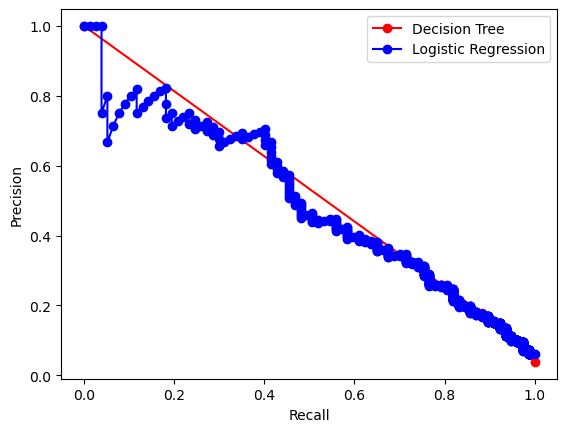

In [77]:
from sklearn.metrics import precision_recall_curve

def generate_pr(y, probs):
    pr, rec, _ = precision_recall_curve(y, probs)
    return pr, rec
    
pr_dt, rec_dt = generate_pr(y_test, y_testp_dt[:,1])
pr_lr, rec_lr = generate_pr(y_test, y_testpr_lr[:,1])

plt.plot(rec_dt, pr_dt,'-or')
plt.plot(rec_lr, pr_lr,'-ob')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(['Decision Tree','Logistic Regression'])
plt.show()

In [28]:
# rec_dt, pr_dt
# rec_lr, pr_lr

[1.       1.       1.       ... 0.03125  0.015625 0.      ] [0.032      0.03201601 0.03203203 ... 1.         1.         1.        ]


> Less choices of probability thresholds with trees since the only probabilities outputted are those derived from the terminal leafs!

> Also seeing a little bit of instability with the Logistic regression model. This isn't entirely uncommon.

> If we visualized this tree, we'd probably find all the defaulted examples mostly in a single leaf.

### What about looking at accuracy, maybe Decision Trees handle the class imbalance?

#### Recall accuracy with Logistic Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

nums = ['balance2income', 'balance', 'income', 
        'balance_student_int', 'income_student_int']

ohes = ['student', 'zero_balance']

processing_pipeline = ColumnTransformer(transformers=[
    ('numscaling', StandardScaler(), nums),
    ('dummys', OneHotEncoder(drop='first'), ohes)]
)

modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('logreg', LogisticRegression())]
)

param_grid = [
  {'logreg__class_weight': [None], 'logreg__C':[0.01, 0.1, 1, 10, 100]}
 ]

gcv_results = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, scoring='accuracy', refit=True)
gcv_results = gcv_results.fit(X_train, y_train)

y_testp = gcv_results.predict(X_test)
y_testpr_lr = gcv_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

### Compared with the Decision Tree

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

nums = ['balance2income', 'balance', 'income', 'balance_student_int',
        'income_student_int']
ohes = ['student', 'zero_balance']

processing_pipeline = ColumnTransformer(transformers=[
    ('numscaling', StandardScaler(), nums),
    ('dummys', OneHotEncoder(drop='first'), ohes)]
)

modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier())]
)

param_grid = [
  {'dt__max_depth': [2, 5, 10, 15, 20],
   'dt__min_samples_split':[3, 5, 10, 20, 40],
   'dt__min_samples_leaf': [2, 5],
   'dt__class_weight':[None]
  }
 ]

gcv_results = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, scoring='accuracy', refit=True)
gcv_results = gcv_results.fit(X_train, y_train)

y_testp = gcv_results.predict(X_test)
y_testpr_lr = gcv_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.77      0.26      0.39        65

    accuracy                           0.97      2000
   macro avg       0.87      0.63      0.69      2000
weighted avg       0.97      0.97      0.97      2000



> Looks like this handles imbalances similar to Logistic Regression, which means the larger class will crowd-out the smaller class. This is because Decision Trees are looking to minimize the impurity and impurity will be very low with imbalanced classses.

# Regression with Trees
For regression, CART uses the same concept, but gini or entropy is replaced with mean squared error:

$$
H(Q_m) = \frac{1}{N_m}\sum(y-\bar{y_m})^2
$$

or Half-Poisson deviance when you have count or frequency:

$$
H(Q_m) = \frac{1}{N_m}\sum(ylog\frac{y}{\bar{y_m}}-y+\bar{y_m})
$$

> Like classification trees, the prediction for a regression is really a leaf-value so it will have different prediction distributions that linear regression.

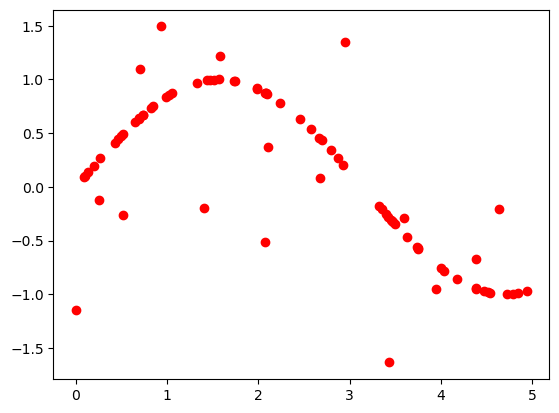

In [29]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

plt.plot(X,y, 'ro')
plt.show()

Examine the difference between a linear regression and decision tree regressor.

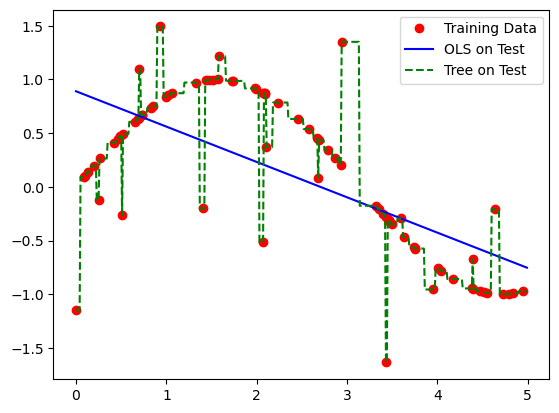

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X_testvals = np.arange(0,5,0.01).reshape(-1,1)

ols_yhat = LinearRegression().fit(X,y).predict(X_testvals)
dtr_yhat = DecisionTreeRegressor().fit(X,y).predict(X_testvals)

plt.plot(X,y, 'ro')
plt.plot(X_testvals, ols_yhat, 'b-')
plt.plot(X_testvals, dtr_yhat, 'g--')
plt.legend(['Training Data', 'OLS on Test', 'Tree on Test'], loc='upper right')
plt.show()

> Again, very sensitive to outliers and you can see the discontinuities that get created. It'll appear like a step function.

### Let's compare a more reasonable example with the California Housing Data

In [31]:
import pandas as pd
import numpy as np

housing = pd.read_csv('https://raw.githubusercontent.com/ekacar1/Data_for_Lectures/main/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


> Need an imputer for total bedrooms

> 1 categorical variable that'll need to be expanded to dummies

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_vars = ['ocean_proximity']

num_vars = ['housing_median_age', 'total_rooms', 'total_bedrooms',
            'population', 'households', 'median_income']

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

housing_fpipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', cat_pipeline, cat_vars)])

print('Housing data pipeline created.')

Housing data pipeline created.


### Split data into training/test

In [34]:
from sklearn.model_selection import train_test_split

housing_y = housing['median_house_value']
housing_features = [x for x in housing.columns if x != 'median_house_value']

X_train, X_test, y_train, y_test = train_test_split(housing[housing_features], housing_y, test_size=0.20)

print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')

Training sample: 16,512
Test sample: 4,128


### Ridge with varying Regularization

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_pipeline = Pipeline([
    ('data_processing', housing_fpipeline),
    ('ridge', Ridge())]
)

param_grid = [{'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}]

ridge_results = GridSearchCV(estimator=ridge_pipeline, param_grid=param_grid, scoring='r2', refit=True)
ridge_results = ridge_results.fit(X_train, y_train)
ridge_yhat = ridge_results.predict(X_test)

ridge_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                      

### Regression Tree

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

dtr_pipeline = Pipeline([
    ('data_processing', housing_fpipeline),
    ('dtr', DecisionTreeRegressor())]
)

param_grid = [{'dtr__max_depth': [2, 4, 6, 8, 10, 12],
               'dtr__min_samples_leaf': [5, 10, 20, 50, 100],
               'dtr__min_samples_split': [5, 10, 15, 25]
              }]

dtr_results = GridSearchCV(estimator=dtr_pipeline, param_grid=param_grid, scoring='r2', refit=True)
dtr_results = dtr_results.fit(X_train, y_train)
dtr_yhat = dtr_results.predict(X_test)

dtr_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                      

### Visualize the differences

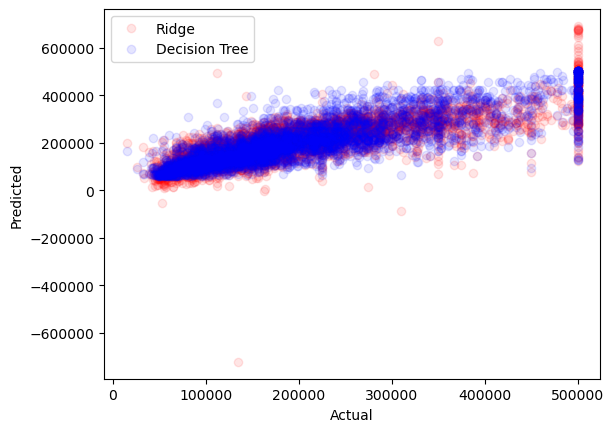

In [37]:
plt.plot(y_test, ridge_yhat, 'ro', alpha=0.1)
plt.plot(y_test, dtr_yhat, 'bo', alpha=0.1)
plt.legend(['Ridge','Decision Tree'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Not as sensitive to truncated distributions:

In [38]:
print(f'Max Ridge Prediction: {ridge_yhat.max():,}')
print(f'Max Regression Tree Prediction: {dtr_yhat.max():,}')
print(f'Max House Value in Test Data: {y_test.max():,}')

Max Ridge Prediction: 691,051.3469104859
Max Regression Tree Prediction: 500,001.0
Max House Value in Test Data: 500,001


#### Result has a better overall fit:

In [39]:
r2r = ridge_results.score(X_test, y_test)

print(f'Ridge R-squared: {r2r:.2%}')

Ridge R-squared: 63.65%


In [40]:
r2dt = dtr_results.score(X_test, y_test)

print(f'Regression Tree R-squared: {r2dt:.2%}')

Regression Tree R-squared: 68.97%


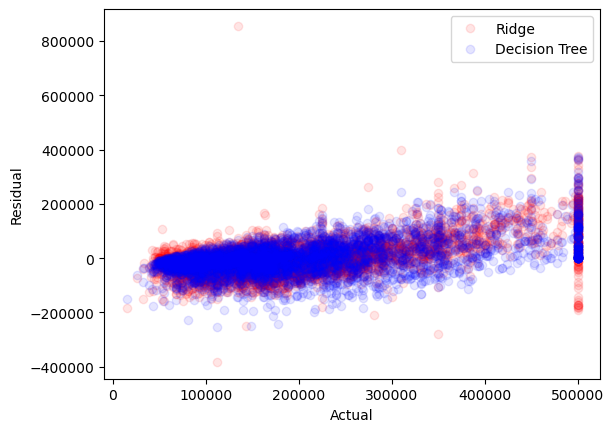

In [41]:
ridge_resid = y_test - ridge_yhat
dtr_resid = y_test - dtr_yhat

plt.plot(y_test, ridge_resid, 'ro', alpha=0.1)
plt.plot(y_test, dtr_resid, 'bo', alpha=0.1)
plt.legend(['Ridge','Decision Tree'])
plt.xlabel('Actual')
plt.ylabel('Residual')
plt.show()

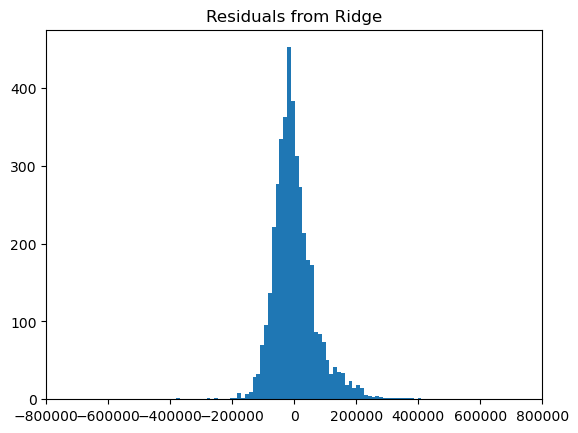

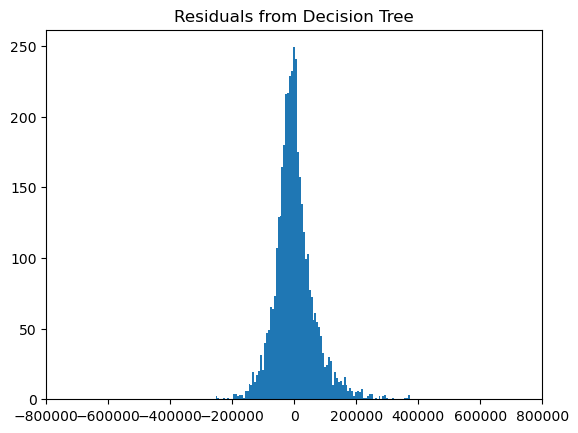

In [42]:
plt.hist(ridge_resid, bins=100)
plt.title('Residuals from Ridge')
plt.xlim((-800000, 800000))
plt.show()

plt.hist(dtr_resid, bins=100)
plt.title('Residuals from Decision Tree')
plt.xlim((-800000, 800000))
plt.show()

- Better behavior in residuals with the truncated values at 500,000  
- Tighter distribution around zero.  
- Would prefer the decision tree to ridge in this case.  

# Random Forests
An ensemble model that combines many weak learners that in compositie, create a strong learner.

> Sometimes using just one model, even tuned, isn't going to give the best results.

> Think of this, individual economic forecasters will each forecast GDP and those forecasts will have some type of range, say between 1.0 and 3.5 percent. Their average forecast 2.25% has historically been the best forecast.

### Basic idea
Given our training data:
- Create many samples of the data w/ replacement (similar to bootstrapping). 
- Then we'll build a decision tree using a subset of the features - selected randomly.
    - If we used the same set of features each time we'd get a bunch of correlated trees.  
    - Good trees will tend to agree with each other.  
    - Bad models will disagree on different ones.  
- We take the majority vote for our prediction.

$$
y \leftarrow \hat{y}(x)=\frac{1}{B}\sum{f_b(x)}
$$

Where $B$ is the number of trees.

> A nice benefit, since it performs bootstrapping, it mitigrates noise that will be specific to the training dataset, so it won't carry as much of that noise when we evaluate our model on the tree set.

<img src='files/diagrams/bootstrap1.png' style='width: 600px'>

Another nice byproduct are feature importances. These don't work with a pipeline, but you could extract these from standalone models and determine which features have the largest importance in relation to reducing impurity.
> The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.
[scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_)

### Important Tuning Knobs
- Number of trees we generate.  
- Number of samples in each sample - keeping this small can increase the training data diversity and reduce overfitting.  

#### Less important knobs
- Samples per leaf.  
- Samples per split. 
- How deep the trees can be.  

### Minor Downsides
- Not an interpretable model.  
- Can't visualize like a single tree.  
- Can be computationally expensive, especially with cross-validation and gird-search.

In [43]:
from sklearn.model_selection import train_test_split

creditFeatures = [x for x in credit.columns if x != 'default']

X_train, X_test, y_train, y_test = train_test_split(credit[creditFeatures], credit_y, test_size=0.20)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 8,000
Test examples: 2,000


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

nums = ['balance2income', 'balance', 'income', 'balance_student_int', 'income_student_int']
ohes = ['student', 'zero_balance']

processing_pipeline = ColumnTransformer(transformers=[
    ('numscaling', StandardScaler(), nums),
    ('dummys', OneHotEncoder(drop='first'), ohes)]
)

rf_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('rf', RandomForestClassifier())]
)

param_grid = [{'rf__max_depth': [5, 8, 10, 12],
               'rf__n_estimators': [10, 50, 100],
               'rf__class_weight': [None, 'balanced', 'balanced_subsample'],
               'rf__max_samples': [1000, 2000, 5000]
              }]

rf_results = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring='recall', refit=True)
rf_results = rf_results.fit(X_train, y_train)
rf_yhat = rf_results.predict(X_test)

rf_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numscaling',
                                                  StandardScaler(),
                                                  ['balance2income', 'balance',
                                                   'income',
                                                   'balance_student_int',
                                                   'income_student_int']),
                                                 ('dummys',
                                                  OneHotEncoder(drop='first'),
                                                  ['student',
                                                   'zero_balance'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=5, max_samples=5000,
                                        n_estimators=10))])

In [45]:
y_testp = rf_results.predict(X_test)
y_testp_rf = rf_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1937
           1       0.18      0.81      0.29        63

    accuracy                           0.88      2000
   macro avg       0.59      0.84      0.61      2000
weighted avg       0.97      0.88      0.91      2000



> Didn't use all the potential knobs, but performed about the same as the decision tree.

# Feature Importance with Random Forests
- The relative importance of features.  
- How often the nodes use that feature reduce the impurity across the forest.  
- The result is scaled so the importances sum to 1.  

In [46]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500)
rnd_clf.fit(X, y)

RandomForestClassifier(n_estimators=500)

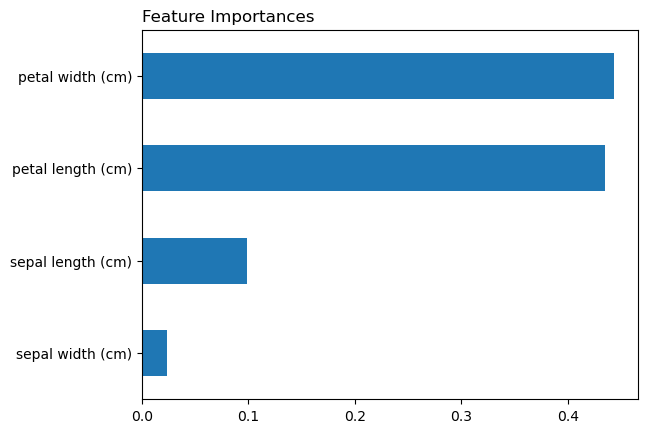

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

imps = list(zip(iris.feature_names, rnd_clf.feature_importances_))

fi = pd.Series([x[1] for x in imps], index=[x[0] for x in imps])
fi = fi.sort_values(ascending=True)

fi.plot.barh()
plt.title('Feature Importances', loc='left')
plt.show()

### Another Example with Feature Importance using the breast cancer data

In [48]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_cancer = cancer['data']
y_cancer = cancer['target']

X_cancer[0,:]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [49]:
from sklearn.model_selection import train_test_split

cX_train, cX_test, cy_train, cy_test = train_test_split(X_cancer, y_cancer,
                                                        test_size=0.2)

print(f'Training examples: {cX_train.shape[0]:,}')
print(f'Test examples: {cX_test.shape[0]:,}')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 200, 500, 750],
          'max_depth': [1, 2, 5, 10]
         }

rfm = GridSearchCV(RandomForestClassifier(), param_grid = params, cv=10,
                  scoring='accuracy')

rfm = rfm.fit(cX_train, cy_train)
rfm.best_estimator_

Training examples: 455
Test examples: 114


RandomForestClassifier(max_depth=10)

In [50]:
print(f'Validation Best Score: {rfm.best_score_:.2%}')

Validation Best Score: 96.04%


In [51]:
print(f'Test Score: {rfm.score(cX_test, cy_test):.2%}')

Test Score: 97.37%


- High explanatory power. 
- Good generalization.  
- Safe to look at the feature importances.  

> These have the same caveats as regression weights. If your model is very weak, looking at the feature importances can be very misleading and can look like p-value hacking.

GridSearchCV doesn't support `feature_importances_`, so train a separate model with the chosen hyperparameters.

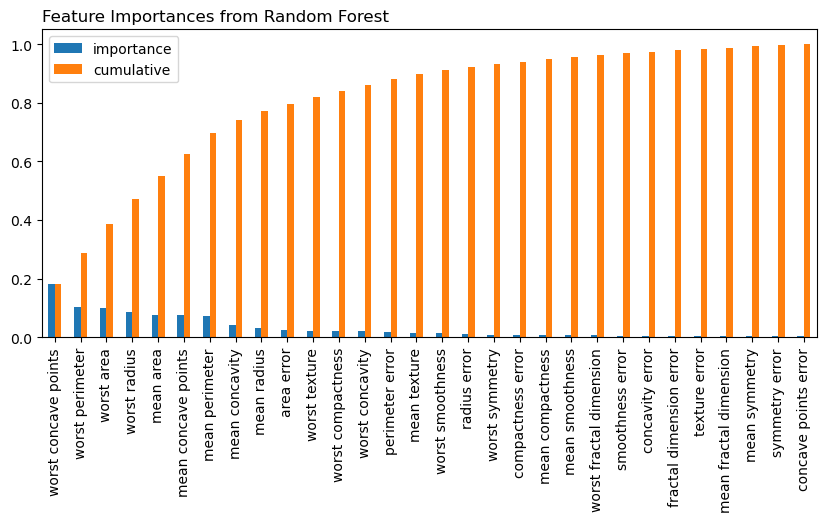

In [52]:
rf = RandomForestClassifier(max_depth=10).fit(cX_train, cy_train)
impt = rf.feature_importances_

impt = list(zip(cancer['feature_names'], impt))
impt = pd.DataFrame(impt)
impt.columns = ['feature', 'importance']
impt = impt.set_index('feature')
impt = impt.sort_values(by='importance', ascending=False)
impt['cumulative'] = impt['importance'].cumsum()

impt.plot.bar(figsize=(10,4))
plt.title('Feature Importances from Random Forest', loc='left')
plt.xlabel('')
plt.show()

# Wine Example

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

wine = pd.read_csv('https://raw.githubusercontent.com/ekacar1/Data_for_Lectures/main/winequality-white.csv', sep=';')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Check the data for NAs and types

In [54]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Variable of Interest - Wine Quality

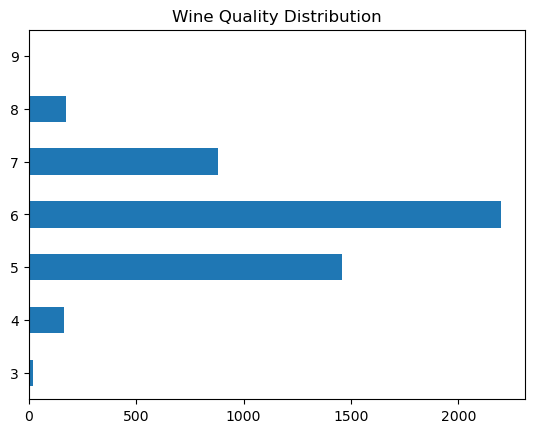

In [55]:
wine.quality.value_counts().sort_index().plot.barh()
plt.title('Wine Quality Distribution')
plt.show()

In [56]:
wine = wine.query('quality > 3 and quality < 9')

## Might be good candidate for a tree instead of linear regression
- Could also try to model this as a classification problem  
- One benefit with using regression vs. classification is we'll try to get close to the quality, with classification a 1 vs. 5 compared to a 4 vs. 5 is the same.

In [57]:
from sklearn.model_selection import train_test_split

wine_features = [x for x in wine.columns if x != 'quality']

wX_train, wX_test, wy_train, wy_test = train_test_split(wine[wine_features],
                                                        wine['quality'],
                                                        test_size=0.20)

print(f'Training examples: {wX_train.shape[0]:,}')
print(f'Test examples: {wX_test.shape[0]:,}')

Training examples: 3,898
Test examples: 975


### Linear Regression Baseline

Training score: 27.75%
Test score: 34.92%


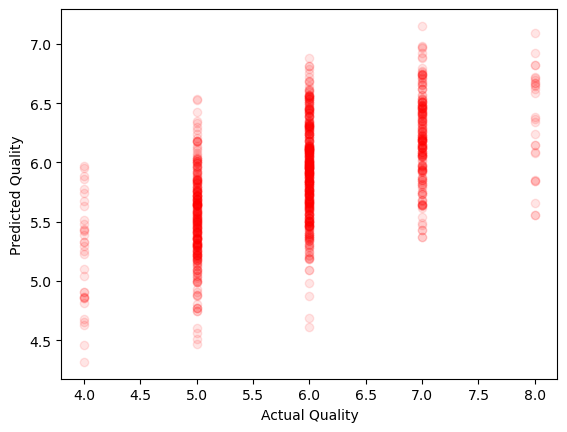

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

wine_pipe = Pipeline([('scale', StandardScaler()), ('lm', LinearRegression())])
wine_pipe = wine_pipe.fit(wX_train, wy_train)

wine_training_score = wine_pipe.score(wX_train, wy_train)
wine_test_score = wine_pipe.score(wX_test, wy_test)
wine_pred = wine_pipe.predict(wX_test)

print(f'Training score: {wine_training_score:.2%}')
print(f'Test score: {wine_test_score:.2%}')

plt.plot(wy_test, wine_pred, 'ro', alpha=0.1)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100],
          'max_depth': [5, 10],
          'criterion': ['squared_error', 'poisson']
         }

rfr = GridSearchCV(RandomForestRegressor(), param_grid = params, cv=10,
                  scoring='r2', refit=True)

rfr = rfr.fit(wX_train, wy_train)
rfr.best_estimator_

RandomForestRegressor(max_depth=10)

In [60]:
print(f'Validation score: {rfr.score(wX_train, wy_train):.2%}')
print(f'Test score: {rfr.score(wX_test, wy_test):.2%}')

Validation score: 73.64%
Test score: 51.35%


> Looks like we have overfitting; see the 25-point difference in the validation vs. test scores

> Since the performance is so much better than linear regression, we'd probably go with this model, based on the 20-point difference in $R^2$

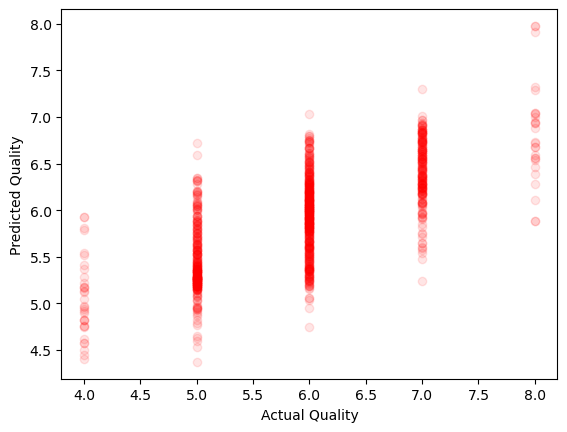

In [61]:
wine_pred2 = rfr.predict(wX_test)

plt.plot(wy_test, wine_pred2, 'ro', alpha=0.1)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.show()

### Prediction Comparison

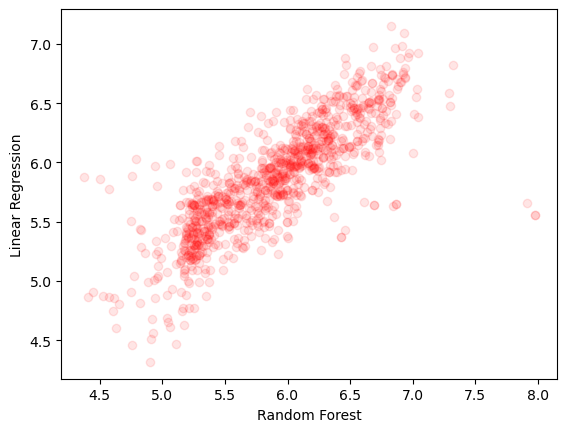

In [62]:
plt.plot(wine_pred2, wine_pred, 'ro', alpha=0.1)
plt.xlabel('Random Forest')
plt.ylabel('Linear Regression')
plt.show()

### Creative Evaluation

In [63]:
import numpy as np

wine_eval = pd.DataFrame(np.stack([wy_test, wine_pred, wine_pred2], axis=1))
wine_eval.columns = ['test_value', 'lm_pred', 'rf_pred']
wine_eval.head()

,test_value,lm_pred,rf_pred
0,6.0,6.141604,6.487132
1,6.0,6.330360,6.138672
2,4.0,5.777004,4.577167
3,7.0,6.050010,6.283410
4,6.0,6.278603,6.199067


- Could look at confusion matrices. 
- Look at rounding. 
- Maybe be could combined the predictions?

In [64]:
round_eval = wine_eval.round(0)

In [65]:
from sklearn.metrics import classification_report

print(classification_report(round_eval['test_value'].astype(int), 
                            round_eval['lm_pred'].astype(int), zero_division=1))

              precision    recall  f1-score   support

           4       0.67      0.06      0.11        33
           5       0.60      0.46      0.52       287
           6       0.51      0.78      0.62       436
           7       0.43      0.20      0.28       192
           8       1.00      0.00      0.00        27

    accuracy                           0.53       975
   macro avg       0.64      0.30      0.31       975
weighted avg       0.54      0.53      0.49       975



In [66]:
print(classification_report(round_eval['test_value'].astype(int), 
                            round_eval['rf_pred'].astype(int), zero_division=1))

              precision    recall  f1-score   support

           4       0.75      0.09      0.16        33
           5       0.65      0.64      0.64       287
           6       0.60      0.75      0.67       436
           7       0.61      0.46      0.52       192
           8       1.00      0.11      0.20        27

    accuracy                           0.62       975
   macro avg       0.72      0.41      0.44       975
weighted avg       0.64      0.62      0.60       975



### Straight Classification

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings

params = {'n_estimators': [100, 200]
         }

rfc = GridSearchCV(RandomForestClassifier(), param_grid = params, cv=10,
                  scoring='accuracy', refit=True)

rfc = rfc.fit(wX_train, wy_train)
rfc.best_estimator_

RandomForestClassifier(n_estimators=200)

In [68]:
wine_pred3 = rfc.predict(wX_test)

print(classification_report(wy_test, wine_pred3, zero_division=1))

              precision    recall  f1-score   support

           4       0.75      0.27      0.40        33
           5       0.76      0.72      0.74       287
           6       0.68      0.84      0.75       436
           7       0.74      0.52      0.61       192
           8       0.73      0.41      0.52        27

    accuracy                           0.71       975
   macro avg       0.73      0.55      0.60       975
weighted avg       0.72      0.71      0.70       975



> Looks like classification is better in this case.

# Readings
- [scikit Decision Trees](https://scikit-learn.org/stable/modules/tree.html)  
- [Decision tree - Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)  
- [Chapter 9.2 Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/)  
- [Python Machine Learning 3rd Edition, Pages 90-102](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch03)